# Run the whole deltas algorithm

In [60]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

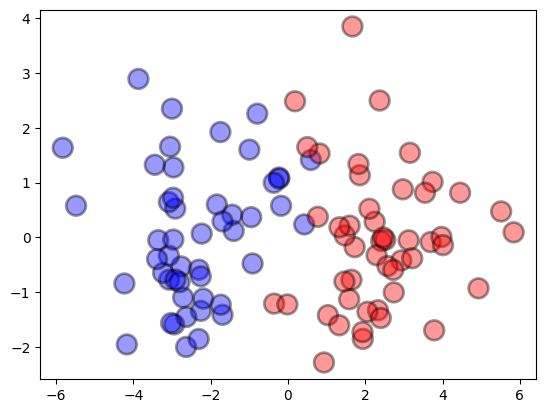

In [61]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing'}
dataset = datasets[9]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=False)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

## Get Classifier

clf


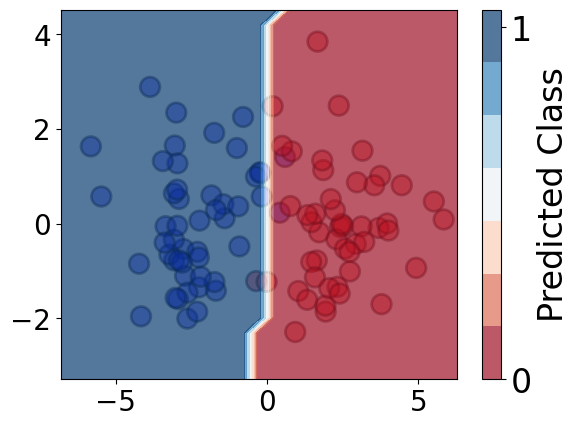

SMOTE


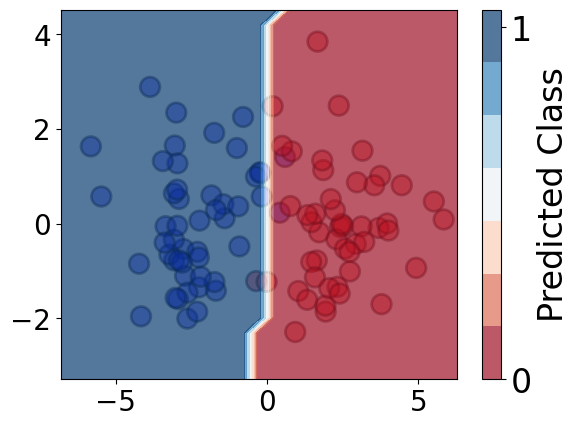

In [62]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'], clf_SMOTE = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

## Fit deltas

Original Data


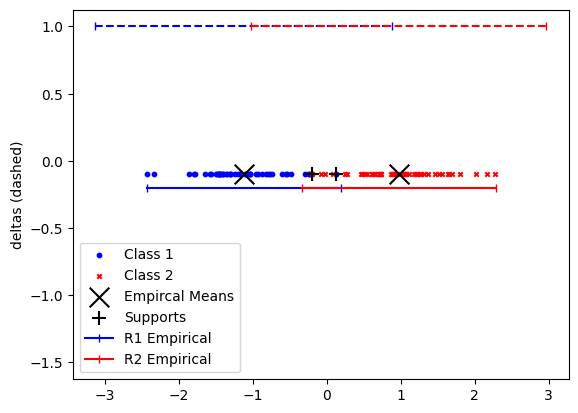

Budget 96 found 55 viable downsampled solutions
Best solution found by removing 38 data points
Downsampled Data:


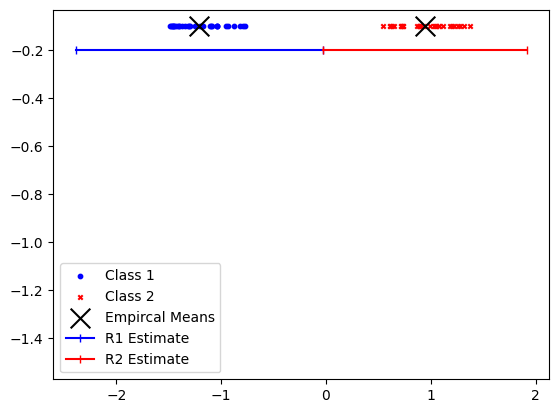

In [114]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=1, 
                                                     _print=True, 
                                                     _plot=True, 
                                                     max_trials=1000, 
                                                     method='supports', 
                                                     parallel=True)

## Plot training data information

In [64]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

Not fit to any data yet, call 'fit(X, y)'  method first


## Show parameters

In [65]:
deltas_model.print_params()

Not fit to any data yet, call 'fit(X, y)' or  method first


# Evaluation on test data

Not fit to any data yet, call 'fit(X, y)' or  method first
original accuracy: 0.8809523809523809
SMOTE accuracy: 0.8809523809523809
deltas accuracy: 0.8809523809523809

original F1: 0.888888888888889
SMOTE F1: 0.888888888888889
deltas F1: 0.888888888888889

original precision0: 0.9444444444444444
SMOTE precision0: 0.9444444444444444
deltas precision0: 0.9444444444444444

original precision1: 0.8333333333333334
SMOTE precision1: 0.8333333333333334
deltas precision1: 0.8333333333333334

original


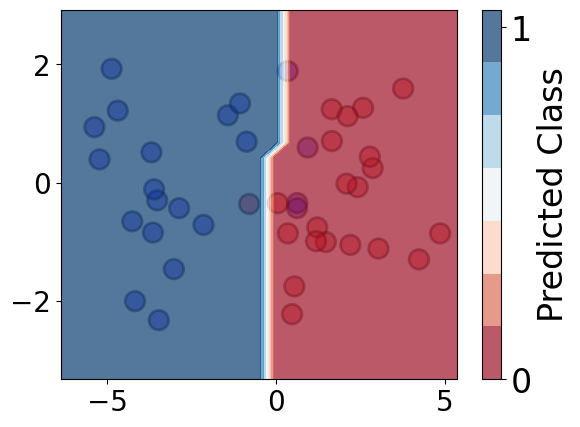

SMOTE


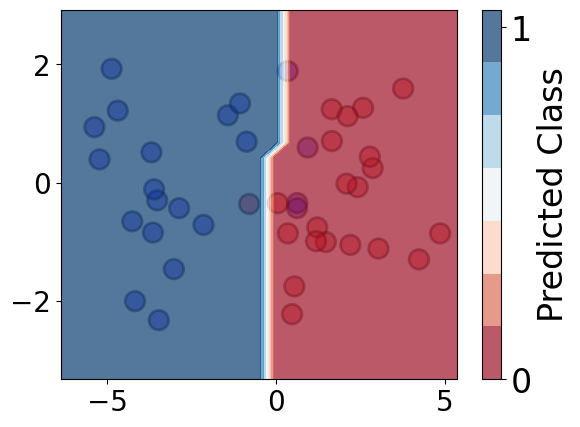

deltas
Not fit to any data yet, call 'fit(X, y)' or  method first


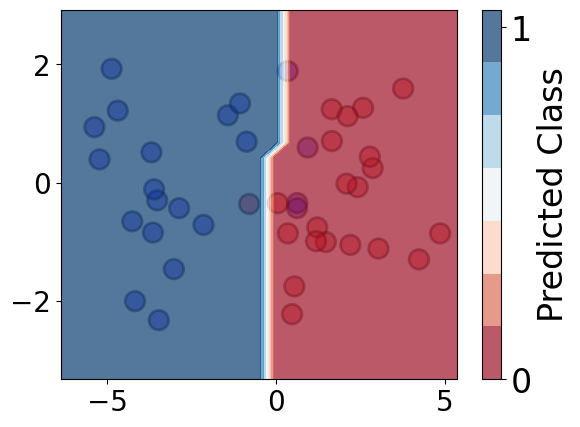

Giving bias from original classifier


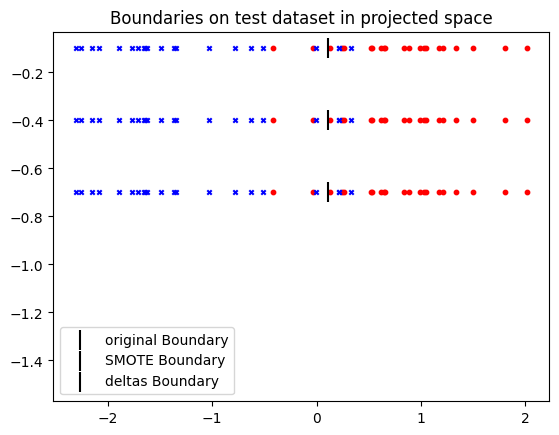

In [66]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
evaluation.eval_test(mdels, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])